In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.metrics import mean_squared_error
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import statsmodels.api as sm
import matplotlib as mpl
import scipy.stats as stats
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
mpl.rcParams.update({'font.size': 16})
%matplotlib inline
from sklearn import (
    cluster, datasets, 
    decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics


In [2]:
df = pd.read_excel('data/pnu.xls')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Subject's Home Place,Case #,Age (years),Chest Radiography,New pulmonary infiltrate,Cavitation,Pleural effusion,Pleural effusion localization,Chest CT-Scan,Chest CT-Scan Date,New pulmonary infiltrate.1,Cavitation.1,Pleural effusion.1,Pleural effusion localization.1,CAP diagnostic criteria,New pulmonary infiltrate.2,[New or progressive cough] Acute disease (<7 days evolution) with at least 2 of the following findings,Purulent expectoration or changes in the characteristics of usual sputum] Acute disease (<7 days of evolution)with at least 2 of the following findings,[Auscultatory findings consistent with CAP] Acute disease (<7 days evolution) with at least 2 of the following findings,Fever> 38ºC or hypothermia,"Change in leukocytes (leukocytosis> 10,000), <15 clumps or leukopenia <4,000)] Acute disease (<7 days evolution) with at least 2 of the following findings","Dyspnea, tachypnea or hypoxemia (O2 or O2 saturation <60 mmHg)] Acute disease (<7 days evolution) with at least 2 of the following findings",THE PATIENT DOES NOT MEET THE INCLUSION CRITERIA - YOU MUST NOT ENTER THE STUDY,The patient is correctly enrolled in the study,Number of days with respiratory symptoms prior to consultation,Neoplasms (active or within the last year)] Relevant clinical history,Cardiovascular disease] Relevant clinical history,Stroke] Relevant clinical history,[Kidney disease] Relevant clinical history,[Liver disease] Relevant clinical history,Neurological or psychiatric disease] Relevant clinical history,[Diabetes mellitus] Relevant clinical history,[Hospitalization for CAP in the previous year]Relevant clnical history,[Suspected aspiration] Relevant clinical history,Alcoholism] Relevant clinical history,Chronic treatment with steroids or other immunosuppressive drugs] Relevant clinical record,COPD] Relevant clinical history,[IV drug usage] Relevant clinical history,[Overcrowding] Relevant clinical history,"If your answer to Cardiovascular Disease was YES, select one of the following categories",History of smoking,History of smoking.1,HIV positive,"If available, last CD4 in the previous year (absolute value)",Last viral load in the previous year,Receive ARV,[Hospice resident] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Hospitalization≥ 2 days in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Antibiotics IV in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Chemotherapy in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Dialysis in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Home Care of Injuries] Risk Factors for Healthcare-Associated Pneumonia (HCAP),Physical Exam,Altered mental state,Heart rate,Respiratory frequency,Systolic pressure,Diastolic pressure,Temperature,[Not done] Saturation O2,[Other] Saturation O2,Laboratory findings closest to the diagnosis of CAP,Hematocrit,Hematocrit value,Hemoglobin,Hemoglobin value,Leukocytes,Leukocytes value,Band Cells,Band cell value,Band cell date,Segmented neutrophils,Segmented neutrophils value,Platelets,Platelet count,Sodium,Sodium count,Sodium date,Urea,Urea value,Creatinine,Creatinine value,Bicarbonate,Bicarbonate value,Bicarbonate date,Glucose,Glucose value,Albumin,Albumin value,Albumin date,Lactate,Lactate value,Lactate date,High lactate,C-Reactive Protein,CRP value,High CRP,Blood gases,Blood gasses date,pH,PaCO2,PaO2,FiO2,[Respiratory cultures] Any of the following type studies?,[Blood cultures] Any of the following type of studies?,[Pneumococcal Urinary Antigen] Any of the following type of studies?,[Respiratory virus screening] Any of the following type of studies?,[Identification of etiological agent] Any of the following type of studies?,Organism 1,[Blood] Organism 1 - Sample:,[Sputum] Organism 1 - Sample:,[Tracheal aspirate] Organism 1 - Sample:,[BAL] Organism 1 - Sample:,[Urinary antigen] Organism 1 - Sample:,[Serology] Organism 1 - Sample:,[other] Organ

In [5]:
df["Subject's Home Place"].unique()

array(['Location A', 'Location B', 'Location C'], dtype=object)

In [6]:
target_df = df[['Clinical evolution', '1 year post enrollment status:']]

In [7]:
target_df.head()

,Clinical evolution,1 year post enrollment status:
0,Cure,dead after 1 year
1,Improvement,NaN
2,death,dead after 1 year
3,Cure,dead after 1 year
4,death,dead after 1 year


In [8]:
#columns = ['Age (years)', 'Fever> 38ºC or hypothermia','Temperature', 'Number of days with respiratory symptoms prior to consultation', 'COPD] Relevant clinical history','[New or progressive cough] Acute disease (<7 days evolution) with at least 2 of the following findings','Purulent expectoration or changes in the characteristics of usual sputum] Acute disease (<7 days of evolution)with at least 2 of the following findings','[Auscultatory findings consistent with CAP] Acute disease (<7 days evolution) with at least 2 of the following findings','Change in leukocytes (leukocytosis> 10,000), <15 clumps or leukopenia <4,000)] Acute disease (<7 days evolution) with at least 2 of the following findings','Dyspnea, tachypnea or hypoxemia (O2 or O2 saturation <60 mmHg)] Acute disease (<7 days evolution) with at least 2 of the following findings','Clinical evolution']

In [9]:
X = pd.DataFrame(df)


In [10]:
X.head()

,Subject's Home Place,Case #,Age (years),Chest Radiography,New pulmonary infiltrate,Cavitation,Pleural effusion,Pleural effusion localization,Chest CT-Scan,Chest CT-Scan Date,New pulmonary infiltrate.1,Cavitation.1,Pleural effusion.1,Pleural effusion localization.1,CAP diagnostic criteria,New pulmonary infiltrate.2,[New or progressive cough] Acute disease (<7 days evolution) with at least 2 of the following findings,Purulent expectoration or changes in the characteristics of usual sputum] Acute disease (<7 days of evolution)with at least 2 of the following findings,[Auscultatory findings consistent with CAP] Acute disease (<7 days evolution) with at least 2 of the following findings,Fever> 38ºC or hypothermia,"Change in leukocytes (leukocytosis> 10,000), <15 clumps or leukopenia <4,000)] Acute disease (<7 days evolution) with at least 2 of the following findings","Dyspnea, tachypnea or hypoxemia (O2 or O2 saturation <60 mmHg)] Acute disease (<7 days evolution) with at least 2 of the following findings",THE PATIENT DOES NOT MEET THE INCLUSION CRITERIA - YOU MUST NOT ENTER THE STUDY,The patient is correctly enrolled in the study,Number of days with respiratory symptoms prior to consultation,Neoplasms (active or within the last year)] Relevant clinical history,Cardiovascular disease] Relevant clinical history,Stroke] Relevant clinical history,[Kidney disease] Relevant clinical history,[Liver disease] Relevant clinical history,Neurological or psychiatric disease] Relevant clinical history,[Diabetes mellitus] Relevant clinical history,[Hospitalization for CAP in the previous year]Relevant clnical history,[Suspected aspiration] Relevant clinical history,Alcoholism] Relevant clinical history,Chronic treatment with steroids or other immunosuppressive drugs] Relevant clinical record,COPD] Relevant clinical history,[IV drug usage] Relevant clinical history,[Overcrowding] Relevant clinical history,"If your answer to Cardiovascular Disease was YES, select one of the following categories",History of smoking,History of smoking.1,HIV positive,"If available, last CD4 in the previous year (absolute value)",Last viral load in the previous year,Receive ARV,[Hospice resident] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Hospitalization≥ 2 days in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Antibiotics IV in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Chemotherapy in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Dialysis in the previous 90 days] Risk factors for Healthcare-Associated Pneumonia (HCAP),[Home Care of Injuries] Risk Factors for Healthcare-Associated Pneumonia (HCAP),Physical Exam,Altered mental state,Heart rate,Respiratory frequency,Systolic pressure,Diastolic pressure,Temperature,[Not done] Saturation O2,[Other] Saturation O2,Laboratory findings closest to the diagnosis of CAP,Hematocrit,Hematocrit value,Hemoglobin,Hemoglobin value,Leukocytes,Leukocytes value,Band Cells,Band cell value,Band cell date,Segmented neutrophils,Segmented neutrophils value,Platelets,Platelet count,Sodium,Sodium count,Sodium date,Urea,Urea value,Creatinine,Creatinine value,Bicarbonate,Bicarbonate value,Bicarbonate date,Glucose,Glucose value,Albumin,Albumin value,Albumin date,Lactate,Lactate value,Lactate date,High lactate,C-Reactive Protein,CRP value,High CRP,Blood gases,Blood gasses date,pH,PaCO2,PaO2,FiO2,[Respiratory cultures] Any of the following type studies?,[Blood cultures] Any of the following type of studies?,[Pneumococcal Urinary Antigen] Any of the following type of studies?,[Respiratory virus screening] Any of the following type of studies?,[Identification of etiological agent] Any of the following type of studies?,Organism 1,[Blood] Organism 1 - Sample:,[Sputum] Organism 1 - Sample:,[Tracheal aspirate] Organism 1 - Sample:,[BAL] Organism 1 - Sample:,[Urinary antigen] Organism 1 - Sample:,[Serology] Organism 1 - Sample:,[other] Organ

In [11]:
X.fillna(0, inplace = True)

In [12]:
X.rename(str.lower, axis='columns', inplace = True)

In [13]:
X.head()

,subject's home place,case #,age (years),chest radiography,new pulmonary infiltrate,cavitation,pleural effusion,pleural effusion localization,chest ct-scan,chest ct-scan date,new pulmonary infiltrate.1,cavitation.1,pleural effusion.1,pleural effusion localization.1,cap diagnostic criteria,new pulmonary infiltrate.2,[new or progressive cough] acute disease (<7 days evolution) with at least 2 of the following findings,purulent expectoration or changes in the characteristics of usual sputum] acute disease (<7 days of evolution)with at least 2 of the following findings,[auscultatory findings consistent with cap] acute disease (<7 days evolution) with at least 2 of the following findings,fever> 38ºc or hypothermia,"change in leukocytes (leukocytosis> 10,000), <15 clumps or leukopenia <4,000)] acute disease (<7 days evolution) with at least 2 of the following findings","dyspnea, tachypnea or hypoxemia (o2 or o2 saturation <60 mmhg)] acute disease (<7 days evolution) with at least 2 of the following findings",the patient does not meet the inclusion criteria - you must not enter the study,the patient is correctly enrolled in the study,number of days with respiratory symptoms prior to consultation,neoplasms (active or within the last year)] relevant clinical history,cardiovascular disease] relevant clinical history,stroke] relevant clinical history,[kidney disease] relevant clinical history,[liver disease] relevant clinical history,neurological or psychiatric disease] relevant clinical history,[diabetes mellitus] relevant clinical history,[hospitalization for cap in the previous year]relevant clnical history,[suspected aspiration] relevant clinical history,alcoholism] relevant clinical history,chronic treatment with steroids or other immunosuppressive drugs] relevant clinical record,copd] relevant clinical history,[iv drug usage] relevant clinical history,[overcrowding] relevant clinical history,"if your answer to cardiovascular disease was yes, select one of the following categories",history of smoking,history of smoking.1,hiv positive,"if available, last cd4 in the previous year (absolute value)",last viral load in the previous year,receive arv,[hospice resident] risk factors for healthcare-associated pneumonia (hcap),[hospitalization≥ 2 days in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[antibiotics iv in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[chemotherapy in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[dialysis in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[home care of injuries] risk factors for healthcare-associated pneumonia (hcap),physical exam,altered mental state,heart rate,respiratory frequency,systolic pressure,diastolic pressure,temperature,[not done] saturation o2,[other] saturation o2,laboratory findings closest to the diagnosis of cap,hematocrit,hematocrit value,hemoglobin,hemoglobin value,leukocytes,leukocytes value,band cells,band cell value,band cell date,segmented neutrophils,segmented neutrophils value,platelets,platelet count,sodium,sodium count,sodium date,urea,urea value,creatinine,creatinine value,bicarbonate,bicarbonate value,bicarbonate date,glucose,glucose value,albumin,albumin value,albumin date,lactate,lactate value,lactate date,high lactate,c-reactive protein,crp value,high crp,blood gases,blood gasses date,ph,paco2,pao2,fio2,[respiratory cultures] any of the following type studies?,[blood cultures] any of the following type of studies?,[pneumococcal urinary antigen] any of the following type of studies?,[respiratory virus screening] any of the following type of studies?,[identification of etiological agent] any of the following type of studies?,organism 1,[blood] organism 1 - sample:,[sputum] organism 1 - sample:,[tracheal aspirate] organism 1 - sample:,[bal] organism 1 - sample:,[urinary antigen] organism 1 - sample:,[serology] organism 1 - sample:,[other] organ

In [14]:
X.dropna(inplace = True)

In [15]:
#X_dropped = X.dropna()

In [16]:
#X_dropped.info()

NameError: name 'X_dropped' is not defined

In [86]:
#X_dropped.rename(str.lower, axis='columns', inplace = True)

In [17]:
X.replace({'Yes': 1, 'No': 0}, inplace = True)
X.rename(index=str, columns={"subject'shome place": "home", "age (years)": "age", "fever> 38ºc or hypothermia": "abnormal temp"}, inplace = True)
X.rename(index=str, columns={"number of days with respiratory symptoms prior to consultation": "# of days with respiratory symptoms", "copd] relevant clinical history": "copd", "[new or progressive cough] acute disease (<7 days evolution) with at least 2 of the following findings":"new cough less than 7 days"}, inplace = True)
X.rename(index=str, columns={"purulent expectoration or changes in the characteristics of usual sputum] acute disease (<7 days of evolution)with at least 2 of the following findings": "expectoration change less than 7 days", "[auscultatory findings consistent with cap] acute disease (<7 days evolution) with at least 2 of the following findings": "acute disease less than 7 days"}, inplace = True)
X.rename(index=str, columns={"change in leukocytes (leukocytosis> 10,000), <15 clumps or leukopenia <4,000)] acute disease (<7 days evolution) with at least 2 of the following findings": "irregular leukocytes less than 7 days", "dyspnea, tachypnea or hypoxemia (o2 or o2 saturation <60 mmhg)] acute disease (<7 days evolution) with at least 2 of the following findings": "irregular O2 sat less than 7 days"}, inplace = True)

In [143]:
X.head()

,subject's home place,case #,age (years),chest radiography,new pulmonary infiltrate,cavitation,pleural effusion,pleural effusion localization,chest ct-scan,chest ct-scan date,new pulmonary infiltrate.1,cavitation.1,pleural effusion.1,pleural effusion localization.1,cap diagnostic criteria,new pulmonary infiltrate.2,[new or progressive cough] acute disease (<7 days evolution) with at least 2 of the following findings,purulent expectoration or changes in the characteristics of usual sputum] acute disease (<7 days of evolution)with at least 2 of the following findings,[auscultatory findings consistent with cap] acute disease (<7 days evolution) with at least 2 of the following findings,fever> 38ºc or hypothermia,"change in leukocytes (leukocytosis> 10,000), <15 clumps or leukopenia <4,000)] acute disease (<7 days evolution) with at least 2 of the following findings","dyspnea, tachypnea or hypoxemia (o2 or o2 saturation <60 mmhg)] acute disease (<7 days evolution) with at least 2 of the following findings",the patient does not meet the inclusion criteria - you must not enter the study,the patient is correctly enrolled in the study,number of days with respiratory symptoms prior to consultation,neoplasms (active or within the last year)] relevant clinical history,cardiovascular disease] relevant clinical history,stroke] relevant clinical history,[kidney disease] relevant clinical history,[liver disease] relevant clinical history,neurological or psychiatric disease] relevant clinical history,[diabetes mellitus] relevant clinical history,[hospitalization for cap in the previous year]relevant clnical history,[suspected aspiration] relevant clinical history,alcoholism] relevant clinical history,chronic treatment with steroids or other immunosuppressive drugs] relevant clinical record,copd] relevant clinical history,[iv drug usage] relevant clinical history,[overcrowding] relevant clinical history,"if your answer to cardiovascular disease was yes, select one of the following categories",history of smoking,history of smoking.1,hiv positive,"if available, last cd4 in the previous year (absolute value)",last viral load in the previous year,receive arv,[hospice resident] risk factors for healthcare-associated pneumonia (hcap),[hospitalization≥ 2 days in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[antibiotics iv in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[chemotherapy in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[dialysis in the previous 90 days] risk factors for healthcare-associated pneumonia (hcap),[home care of injuries] risk factors for healthcare-associated pneumonia (hcap),physical exam,altered mental state,heart rate,respiratory frequency,systolic pressure,diastolic pressure,temperature,[not done] saturation o2,[other] saturation o2,laboratory findings closest to the diagnosis of cap,hematocrit,hematocrit value,hemoglobin,hemoglobin value,leukocytes,leukocytes value,band cells,band cell value,band cell date,segmented neutrophils,segmented neutrophils value,platelets,platelet count,sodium,sodium count,sodium date,urea,urea value,creatinine,creatinine value,bicarbonate,bicarbonate value,bicarbonate date,glucose,glucose value,albumin,albumin value,albumin date,lactate,lactate value,lactate date,high lactate,c-reactive protein,crp value,high crp,blood gases,blood gasses date,ph,paco2,pao2,fio2,[respiratory cultures] any of the following type studies?,[blood cultures] any of the following type of studies?,[pneumococcal urinary antigen] any of the following type of studies?,[respiratory virus screening] any of the following type of studies?,[identification of etiological agent] any of the following type of studies?,organism 1,[blood] organism 1 - sample:,[sputum] organism 1 - sample:,[tracheal aspirate] organism 1 - sample:,[bal] organism 1 - sample:,[urinary antigen] organism 1 - sample:,[serology] organism 1 - sample:,[other] organ

In [15]:
X.replace({'Cure': 1, 'death': 0}, inplace = True)

In [16]:
X.replace({'Improvement': 1, 'unfavorable' : 0}, inplace = True)

In [17]:
X.replace({'Unavailable': 0}, inplace = True)

In [56]:
X['organism 1'].unique()

array([0, 'Streptococcus pneumoniae', 'AFB', 'Haemophillus Influenzae B',
       'Influenza A', 'Influenza B antigen positive',
       'Staphylococcus aureus', 'Pseudomonas aeruginosa',
       'Klebsiella pneumoniae', 'Streptococcus spp.',
       'Haemophilus influenzae', 'Enterococcus spp.', 'MRSA',
       'Beta-haemolytic Streptococcus', 'Klebsiella pneumoniae ',
       'Moraxella catarrhalis', 'Burkholderia cepacia', 'influenza A',
       'Staphylococcus',
       'Epidermidis group coagulase negative Staphylococcus',
       'Staphylococcus ', 'Haemophillus ', 'Citrobacter freundii',
       'Serratia Marcescens', 'Legionella', 'H1N1',
       'Pneumocystis jiroveci', 'MSSA', 'Mycobacterium tuberculosis',
       'Pseudomonas ', 'Enterobacter', 'Group A Streptococcus'],
      dtype=object)

In [75]:
explore = ['classify initial empirical treatment','clinical evolution']

In [76]:
dumiees = pd.get_dummies(X['organism 1'])

In [77]:
X['strep'] = dumiees['Streptococcus pneumoniae']
X['AFB'] = dumiees['AFB']
X['Pseudomonas aeruginosa'] = dumiees['Pseudomonas aeruginosa']


In [78]:
exp = pd.DataFrame(X[explore])
exp.head()

,classify initial empirical treatment,clinical evolution
0,Beta-lactams + Quinolones,1
1,Beta-lactams + Macrolides,1
2,Beta-lactams + Quinolones,0
3,Macrolides,1
4,Beta-lactams + Quinolones,0


In [83]:
treatment = pd.get_dummies(X['classify initial empirical treatment'])
X['Beta-lactams'] = treatment['Beta-lactams']
X['Beta-lactams + Macrolides'] = treatment['Beta-lactams + Macrolides']
X['Beta-lactams + Quinolones'] = treatment['Beta-lactams + Quinolones']
X['Macrolides'] = treatment['Macrolides']
X['Other'] = treatment['Other']
X['Quinolones'] = treatment['Quinolones']

In [80]:
exp.groupby('classify initial empirical treatment').mean()


,clinical evolution
classify initial empirical treatment,
0,0.750000
Beta-lactams,0.870618
Beta-lactams + Macrolides,0.833542
Beta-lactams + Quinolones,0.762712
Macrolides,0.970297
Other,0.769231
Quinolones,0.918367


In [62]:
exp['organism 1'].value_counts()

0                                                      2097
Streptococcus pneumoniae                                141
AFB                                                      13
Pseudomonas aeruginosa                                    7
Klebsiella pneumoniae                                     3
H1N1                                                      3
Mycobacterium tuberculosis                                3
MSSA                                                      3
Moraxella catarrhalis                                     3
Klebsiella pneumoniae                                     3
MRSA                                                      2
Streptococcus spp.                                        2
Haemophilus influenzae                                    2
Influenza A                                               2
Burkholderia cepacia                                      1
Influenza B antigen positive                              1
Serratia Marcescens                     

In [84]:
Z = pd.DataFrame(X.select_dtypes(exclude=['object']))
Z.head()
Y = pd.DataFrame(Z['clinical evolution'])

In [85]:
Z.drop(columns=['clinical evolution'], inplace = True)

In [86]:
Z.replace(np.inf, 0, inplace = True)

In [100]:
Z.head()

,case #,age (years),cap diagnostic criteria,the patient does not meet the inclusion criteria - you must not enter the study,number of days with respiratory symptoms prior to consultation,"if available, last cd4 in the previous year (absolute value)",physical exam,heart rate,respiratory frequency,systolic pressure,diastolic pressure,temperature,laboratory findings closest to the diagnosis of cap,hematocrit value,hemoglobin value,leukocytes value,band cell value,segmented neutrophils value,platelet count,sodium count,urea value,creatinine value,bicarbonate value,glucose value,albumin value,lactate value,crp value,ph,paco2,pao2,fio2,antimicrobials prescribed for cap treatment,days of antimicrobial treatment,days (work or leisure) lost to disease,number of ambulatory consultations in any health care facility for current cap episode,strep,AFB,Pseudomonas aeruginosa,Beta-lactams,Beta-lactams + Macrolides,Beta-lactams + Quinolones,Macrolides,Other,Quinolones
0,1,95,0.0,0.0,1.0,0.0,0.0,88.0,26.0,100.0,50.0,38.0,0.0,32.0,10.7,15.7,0.0,89.0,175.0,0.0,60.0,1.61,0.0,76.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,14.0,10.0,2.0,0,0,0,0,0,1,0,0,0
1,2,79,0.0,0.0,2.0,0.0,0.0,92.0,24.0,110.0,60.0,38.0,0.0,43.0,14.2,12.5,0.0,80.0,170.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,4.0,0,0,0,0,1,0,0,0,0
2,3,89,0.0,0.0,5.0,0.0,0.0,100.0,48.0,140.0,80.0,36.0,0.0,27.0,9.6,6.6,0.0,86.0,120.0,0.0,99.0,0.77,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,1.0,0,0,0,0,0,1,0,0,0
3,4,93,0.0,0.0,3.0,0.0,0.0,95.0,30.0,140.0,80.0,37.0,0.0,33.0,11.4,9.5,0.0,76.0,274.0,0.0,56.0,0.84,0.0,111.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,16.0,15.0,1.0,1,0,0,0,0,0,1,0,0
4,5,81,0.0,0.0,3.0,0.0,0.0,95.0,30.0,120.0,60.0,36.0,0.0,10.4,4.8,75.3,0.0,0.0,27.0,137.0,143.0,2.94,0.0,88.0,0.0,0.0,192.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0,0,0,0,0,1,0,0,0


In [88]:
Z_std = (Z - Z.mean(axis=0))/Z.std(axis=0, ddof=1)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(Z)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
ss = preprocessing.StandardScaler()

In [130]:
X_centered = ss.fit_transform(Z)
pca = decomposition.PCA(n_components=25)
X_pca = pca.fit_transform(X_centered)

In [131]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. varaince of the projections) for the principal components in a fit sklearn PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the skree plot.
      
    title: str
      A title for the skree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

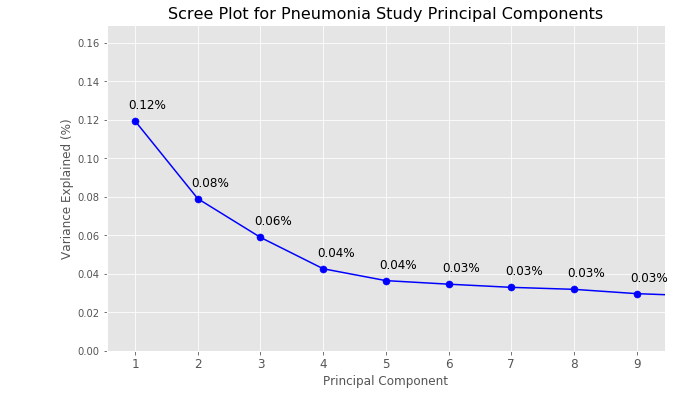

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))
scree_plot(ax, pca, title="Scree Plot for Pneumonia Study Principal Components")

In [133]:
color = Y.values
color = color.reshape(2302,)

In [134]:
pca = decomposition.PCA(n_components=40)
X_pca = pca.fit_transform(X_centered)


In [135]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

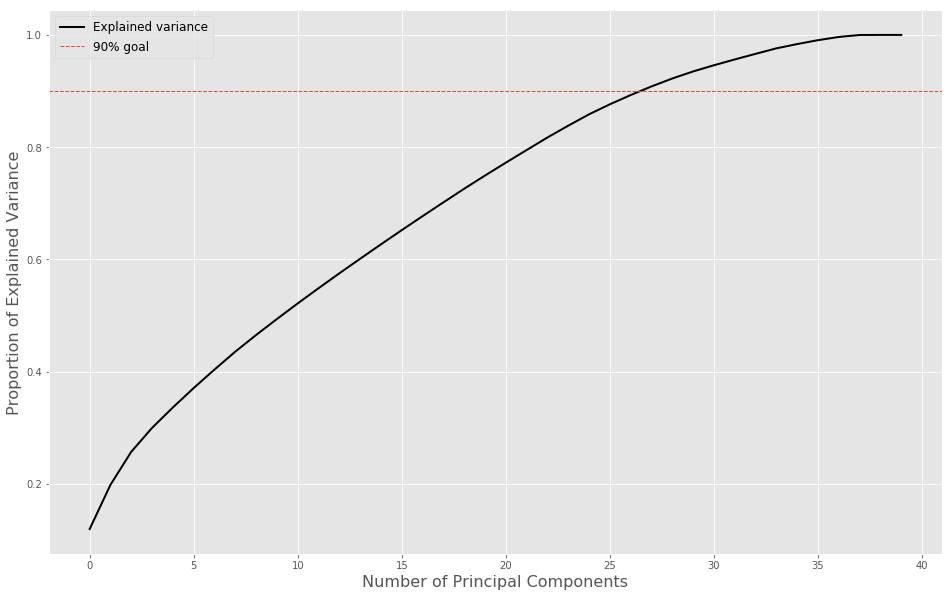

In [193]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(prop_var_expl, color = 'black', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', linewidth=1)
ax.set_ylabel('Proportion of Explained Variance',fontsize=16)
ax.set_xlabel('Number of Principal Components',fontsize=16)
ax.legend(fontsize=12);

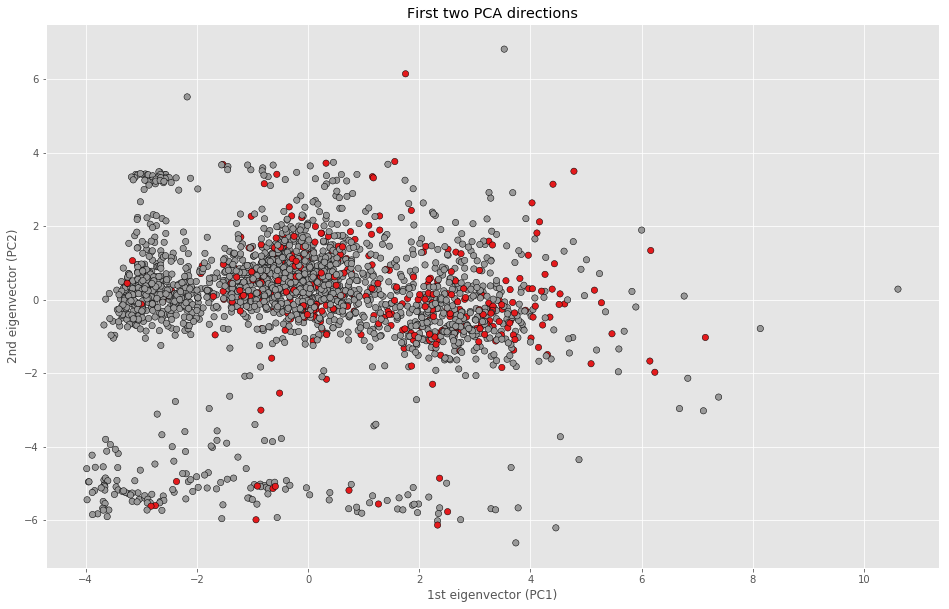

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.scatter(X_pca[:, 0], X_pca[:, 1], cmap=plt.cm.Set1, c=color, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

In [106]:
X_data = Z.values

In [142]:
X_data = X_data[:,:25]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y.values, test_size=0.33, random_state=42)

In [153]:
model = LogisticRegression(random_state=0 ).fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [183]:
y_pred = model.predict(X_test)

In [184]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
precision = metrics.precision_score(y_true=y_test, y_pred=y_pred)
recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_pred)

print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

accuracy: 0.850
precision: 0.850
recall: 0.998
classification_report: 
              precision    recall  f1-score   support

           0       0.86      0.05      0.10       119
           1       0.85      1.00      0.92       641

    accuracy                           0.85       760
   macro avg       0.85      0.52      0.51       760
weighted avg       0.85      0.85      0.79       760



In [158]:
model.score(X_test, y_test)

0.85

In [168]:
bern = BernoulliNB()

In [169]:
bern.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [174]:
bern_score = bern.score(X_test,y_test)
bern_score

0.8289473684210527

In [185]:
y_hat = bern.predict(X_test)

In [186]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_hat)
precision = metrics.precision_score(y_true=y_test, y_pred=y_hat)
recall = metrics.recall_score(y_true=y_test, y_pred=y_hat)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_hat)

print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

accuracy: 0.829
precision: 0.847
recall: 0.973
classification_report: 
              precision    recall  f1-score   support

           0       0.26      0.05      0.08       119
           1       0.85      0.97      0.91       641

    accuracy                           0.83       760
   macro avg       0.55      0.51      0.50       760
weighted avg       0.75      0.83      0.78       760



In [172]:
bern_params = bern.get_params()

In [173]:
bern_params

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [179]:
Y.sum()/Y.count()

clinical evolution    0.859253
dtype: float64